# **Tarea 2**
## Centralidad y redes de transporte urbano

- **Fecha de entrega!** sábado 6 de noviembre!!!
- **Modalidad!** informe escrito + exposición muy breve!
- La tarea supone la elección de un sistema de transporte público, por ejemplo de metro, que pueda ser representado como una red. Elija un sistema de transporte de alguna de estas fuentes de datos:
    - https://www.nature.com/articles/sdata201889
    - https://github.com/AissamDjahnine/Metro-Problem-
    - https://www.kaggle.com/ninetyninenewton/seoul-subway-coordinates
- En el **informe escrito** (con extensión máxima de 5 páginas (incluyendo referencias)), deberá resumir los principales resultados (las secciones pueden variar, esto es solo una guía):
    - **Breve introducción al problema**
    - **Metodología** (datos; conceptos de redes; métodos de análisis; pasos para la construcción de la red)
    - **Resultados** (debe dedicar una mini-subsección a la descripción de la red elegida (número de nodos, aristas, kilómetros, mapas, entre otras posibilidades))
    - **Conclusiones**
- En la exposición, la idea es contar en 5-10 minutos los principales resultados. 

## Centralidad y análisis de redes

El principal concepto de la tarea es la **centralidad**. La **centralidad** (a través de múltiples medidas) permite develar la **importancia** de los nodos de una red. Mediante este concepto, su trabajo deberá responder algunas de las siguientes preguntas sobre el sistema de transporte elegido:
- ¿De qué forma la centralidad de las estaciones (en la red de transporte público) nos ayuda a entender su funcionamiento?
- ¿En qué medida la centralidad de las estaciones nos muestra algo sobre la estructura de la red?
- ¿Es posible medir la redundancia de la red (diferentes rutas entre un origen y un destino) a través de medidas de centralidad?
- ¿Cómo podemos estudiar la **robustez** de la red, es decir, su capacidad de mantenerse conectada a pesar de remover estaciones o conexiones entre estaciones?
- ¿Qué información sobre el sistema de transporte elegido nos entregan distintas medidas de centralidad?
- Otra pregunta! Siéntanse libres de proponer preguntas!

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
%matplotlib inline


In [2]:
lines       = pd.read_csv('network_subway.csv', sep=';')
#stations    = pd.read_csv('network_nodes.csv', sep=';')
#connections = pd.read_csv('network_tram.csv', sep=';')

In [4]:
lines

,from_stop_I,to_stop_I,d,duration_avg,n_vehicles,"route_I_counts,"
0,1,3,738,95.478261,460,"109:460,"
1,3,1,738,123.354839,465,"108:465,"
2,3,5,906,78.872017,461,"109:461,"
3,5,3,906,100.774194,465,"108:465,"
4,5,7,990,101.778742,461,"109:461,"
...,...,...,...,...,...,...
722,947,945,771,88.580442,317,"50:317,"
723,947,949,1271,131.320755,318,"49:318,"
724,949,947,1271,120.000000,317,"50:317,"
725,949,951,1277,166.792453,318,"49:318,"


In [79]:
lines.dtypes

from_stop_I          int64
to_stop_I            int64
d                    int64
duration_avg       float64
n_vehicles           int64
route_I_counts,     object
dtype: object

In [4]:
stations.head(3)

,lat,lon,name
stop_I,,,
1,48.826948,2.367038,Olympiades
3,48.829831,2.376120,Bibliothèque-François Mitterrand
5,48.833314,2.387300,Cour Saint-Emilion


In [81]:
connections.head(3)

,from_stop_I,to_stop_I,d,duration_avg,n_vehicles,route_I_counts
0,14118,14116,326,60.0,193,1054:193
1,14119,14121,442,60.0,192,1052:192
2,27321,27559,583,60.0,178,1079:178


In [82]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(lines, 'from_stop_I','to_stop_I', ['route_I_counts,'])

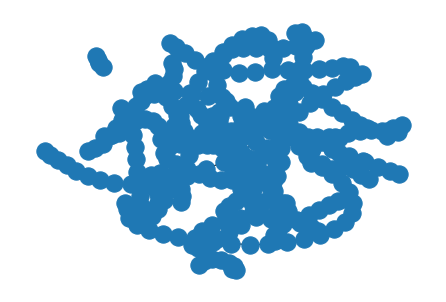

In [87]:
nx.draw(G, with_labels=False)

In [99]:
pos=nx.spring_layout(G)

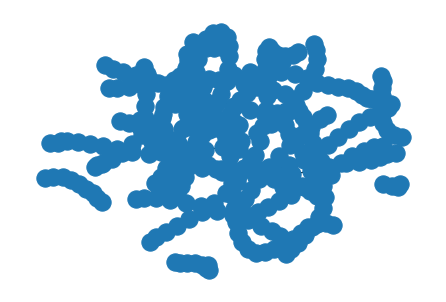

In [100]:
nx.draw(G,pos)

In [93]:
gdf = geopandas.GeoDataFrame(
    stations, geometry=geopandas.points_from_xy(stations.lon, stations.lat))

In [94]:
print(gdf.head())

   stop_I        lat       lon                              name  \
0       1  48.826948  2.367038                        Olympiades   
1       3  48.829831  2.376120  Bibliothèque-François Mitterrand   
2       5  48.833314  2.387300                Cour Saint-Emilion   
3       7  48.840543  2.379409                             Bercy   
4       9  48.844652  2.373108                      Gare de Lyon   

                   geometry  
0  POINT (2.36704 48.82695)  
1  POINT (2.37612 48.82983)  
2  POINT (2.38730 48.83331)  
3  POINT (2.37941 48.84054)  
4  POINT (2.37311 48.84465)  


In [95]:
ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

NameError: name 'world' is not defined

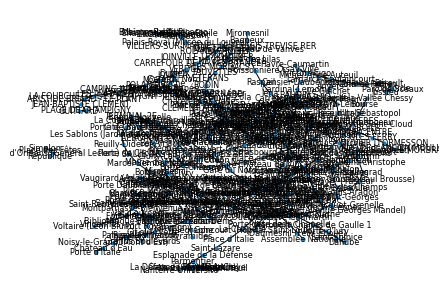

In [105]:
labels = nx.get_node_attributes(G, 'name')
nx.draw(G,labels=labels,node_size=10, font_size=8)

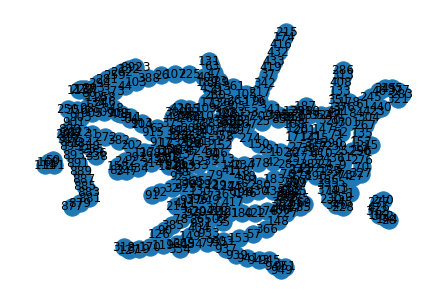

In [124]:
nx.draw(G, with_labels=True)

In [107]:
df = nx.to_pandas_edgelist(G)

In [121]:
stops = geopandas.read_file('stops.geojson')
routes = geopandas.read_file('routes.geojson')
sections = geopandas.read_file('sections.geojson')

In [116]:
routes.head()

,route_type,route_name,route_I,geometry
0,3,370,1,"LINESTRING (2.41628 48.99428, 2.41412 48.99944..."
1,3,292,2,"LINESTRING (2.33419 48.69169, 2.33186 48.68961..."
2,3,292,3,"LINESTRING (2.33252 48.68520, 2.34596 48.69289..."
3,3,185,5,"LINESTRING (2.41192 48.75476, 2.41330 48.75850..."
4,3,185,6,"LINESTRING (2.36043 48.81838, 2.36062 48.81476..."


In [120]:
stops.head()

,id,stop_I,name,geometry
0,0,1,Olympiades,POINT (2.36704 48.82695)
1,1,3,Bibliothèque-François Mitterrand,POINT (2.37612 48.82983)
2,2,5,Cour Saint-Emilion,POINT (2.38730 48.83331)
3,3,7,Bercy,POINT (2.37941 48.84054)
4,4,9,Gare de Lyon,POINT (2.37311 48.84465)


In [122]:
sections.head()

,from_stop_I,duration_avg,route_I_counts,to_stop_I,route_type,n_vehicles,geometry
0,441,300.000000,{'975': 555},442,3,555,"LINESTRING (2.34261 48.88470, 2.34254 48.88558)"
1,442,300.000000,{'976': 555},441,3,555,"LINESTRING (2.34254 48.88558, 2.34261 48.88470)"
2,558,2461.621622,{'221': 74},2423,3,74,"LINESTRING (2.33059 48.87210, 2.54199 49.01537)"
3,560,347.500000,{'222': 72},13726,3,72,"LINESTRING (2.56473 49.00393, 2.54149 49.01526)"
4,561,67.500000,{'222': 72},560,3,72,"LINESTRING (2.57658 49.00448, 2.56473 49.00393)"


In [142]:
paris = geopandas.sjoin(stops, sections, how='inner')


In [143]:
paris.head()

,id,stop_I,name,geometry,index_right,from_stop_I,duration_avg,route_I_counts,to_stop_I,route_type,n_vehicles
0,0,1,Olympiades,POINT (2.36704 48.82695),13699,3,123.354839,{'108': 465},1,1,465
1,1,3,Bibliothèque-François Mitterrand,POINT (2.37612 48.82983),13699,3,123.354839,{'108': 465},1,1,465
0,0,1,Olympiades,POINT (2.36704 48.82695),13698,1,95.478261,{'109': 460},3,1,460
1,1,3,Bibliothèque-François Mitterrand,POINT (2.37612 48.82983),13698,1,95.478261,{'109': 460},3,1,460
1,1,3,Bibliothèque-François Mitterrand,POINT (2.37612 48.82983),13700,3,78.872017,{'109': 461},5,1,461


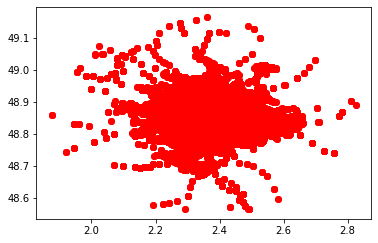

In [144]:
paris.plot(color='red')

plt.show()